# Time Series Analysis

The term **time-series analysis (TSA)** refers to the statistical approach to time-series or the analysis of trend and seasonality. It is often an ad hoc exploration and analysis that usually involves visualizing distributions, trends, cyclic patterns, and relationships between features, and between features and the target(s).


 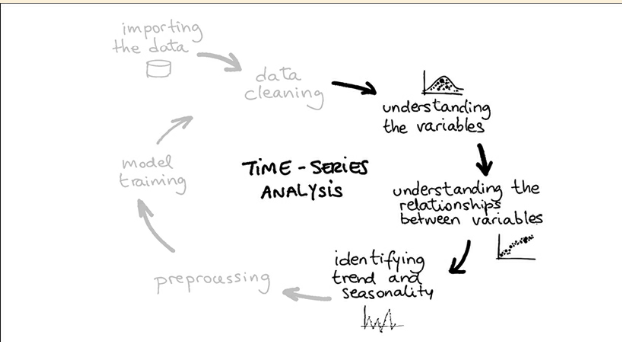

 Time Series machine learning flywheel

Here are a few crucial steps for working with time-series:

* Importing the dataset

* Data cleaning 
* Understanding variables 
* Uncovering relationships between variables 
* Identifying trend and seasonality 
* Preprocessing (including feature engineering) 
* Training a machine learning model


## Datetime

`datetime` comes with objects such as `date`, `datetime`, `time`, and `timedelta`, among others. The difference between `datetime` and `date` objects is that the `datetime` object includes time information in addition to a date.


In [ ]:
# to get a date, we can to do this
from datetime import date

In [ ]:
# to get today's date:
today = date.today()
today

datetime.date(2023, 3, 14)

In [ ]:
# to get some other date:
other_date = date(2023, 4, 25)
other_date

datetime.date(2023, 4, 25)

In [ ]:
# if we want a `datetime` object (a timestamp) instead, we can do this as well:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2023, 3, 14, 5, 45, 23, 686709)

In [ ]:
# we can create a `datetime` for a specific date and time 
some_date = datetime(2021, 5, 18, 15, 39, 0)
some_date.isoformat()

'2021-05-18T15:39:00'

In [ ]:
# we can also work with time difference using `timedelta`:
from datetime import timedelta
year = timedelta(days=365)


These timedelta objects can be added to other objects for calculations.



In [ ]:
# we can do calculation with `timedelta`
year*10

datetime.timedelta(days=3650)

In [ ]:
some_date.strftime('%A %d %B %Y')



'Tuesday 18 May 2021'

In [ ]:
dt = datetime.strptime('24/03/21 15:48', '%d/%m/%y %H:%M')



## pandas

pandas comes with significant time-series functionality such as date range generation, frequency conversion, moving window statistics, date shifting, and lagging.


In [ ]:
import pandas as pd
pd.date_range(start='2022-03-24', end='2023-03-14')

DatetimeIndex(['2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02',
               ...
               '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10', '2023-03-11', '2023-03-12',
               '2023-03-13', '2023-03-14'],
              dtype='datetime64[ns]', length=356, freq='D')

In [ ]:
pd.Series(pd.date_range("2023", freq='D',periods = 4))

0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
dtype: datetime64[ns]

As we see, this type is called a `DatetimeIndex`. this means we can use this data type for indexing a dataset.

One of the most important functionalities is parsing to `date` or `datetime` objects from either `string` or separate column.

In [ ]:
df = pd.DataFrame({'year': [2022, 2023],
                   'month': [3,4],
                   'day':[24,25]})

ts1 = pd.to_datetime(df)

In [ ]:
ts2 = pd.to_datetime('20210324', format='%Y%m%d')

In [ ]:
ts2

Timestamp('2021-03-24 00:00:00')

In [ ]:
ts1

0   2022-03-24
1   2023-04-25
dtype: datetime64[ns]

You can take a rolling window for calculations like this:

Thinking 🤔 What Rolling window means. Do not worry I have covered it in detail in the last section of this notebook.

In [ ]:
s = pd.Series([1, 2, 3, 4, 5])
s.rolling(3).sum()

0     NaN
1     NaN
2     6.0
3     9.0
4    12.0
dtype: float64

A time-series would usually be an index with a time object and one or more columns with numeric or other types, such as this:


In [ ]:
rng = pd.date_range('2023-03-14', '2023-09-01', freq='D')

In [ ]:
import numpy as np

ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2023-03-14    0.620967
2023-03-15   -1.787954
2023-03-16    1.177758
2023-03-17   -1.288716
2023-03-18   -2.097776
                ...   
2023-08-28    1.014041
2023-08-29    1.628570
2023-08-30   -0.739836
2023-08-31    1.378833
2023-09-01    0.190496
Freq: D, Length: 172, dtype: float64

In [ ]:
ts[:2].index


DatetimeIndex(['2023-03-14', '2023-03-15'], dtype='datetime64[ns]', freq='D')

In [ ]:
ts['2021-03-28':'2021-03-30']
 

Series([], Freq: D, dtype: float64)

In [ ]:
ts.asfreq('M')

2023-03-31   -0.215441
2023-04-30    1.578485
2023-05-31   -1.591353
2023-06-30    1.118255
2023-07-31   -0.399113
2023-08-31    1.378833
Freq: M, dtype: float64

# Understanding the Variables

In [50]:
import numpy as np
import pandas as pd

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
 

In [51]:
pollution = pd.read_csv('/content/spm.csv')

In [52]:
pollution

,Entity,Year,Smoke (Fouquet and DPCC (2011)),Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [53]:
pollution.shape

(331, 4)

In [54]:
pollution.columns

Index(['Entity', 'Year', 'Smoke (Fouquet and DPCC (2011))',
       'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))'],
      dtype='object')

In [55]:
pollution = pollution.rename(
    columns={
        'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
           'Smoke (Fouquet and DPCC (2011))' : 'Smoke',
        'Entity': 'City'
    }
)
pollution.dtypes


City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [56]:
pollution['City'].unique()

array(['Delhi', 'London'], dtype=object)

In [57]:
pollution.Year.min(), pollution.Year.max()

(1700, 2016)

we will convert `Year` column from int64 to `datetime`

In [58]:
# careful: pollution['Year'] = pd.to_datetime(pollution['Year'])
# pandas doesn't handle dates before 1900!
pollution['Year'] = pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)

In [59]:
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

In [60]:
pollution.isnull().mean()

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

In [61]:
pollution.describe()

,Smoke,SPM
count,301.000000,331.000000
mean,210.296440,365.970050
std,88.543288,172.512674
min,13.750000,15.000000
25%,168.571429,288.474026
50%,208.214286,375.324675
75%,291.818182,512.609209
max,342.857143,623.376623


Let's plot a histogram of the SPM variable:

Text(0, 0.5, 'Frequency')

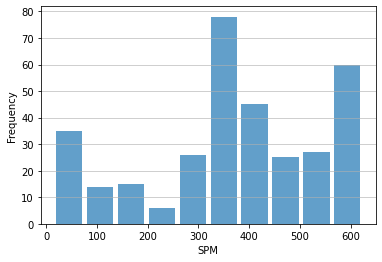

In [62]:
n, bins, patches = plt.hist(
    x=pollution['SPM'], bins='auto',
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')

A histogram can help us if we have continuous measurements and want to understand the distribution of values.

# Uncovering relationships between Variables

Collinearity means that independent variables (features) are correlated. The latter case can be problematic in linear models. Therefore, if we carry out linear regression and find two variables that are highly correlated between themselves, we should remove one of them or use dimensionality reduction techniques such as Principal Component Analysis (PCA).


In [14]:
from scipy import stats
def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]
stats.pearsonr(*ignore_nans(pollution['Smoke'], pollution['SPM']))



PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)

<Figure size 864x432 with 0 Axes>

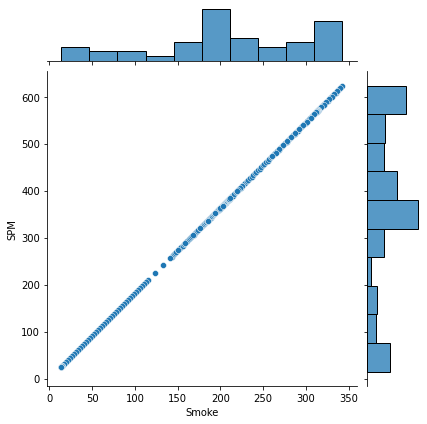

In [18]:
plt.figure(figsize=(12, 6))
sns.jointplot(
    x='Smoke', y='SPM',
    edgecolor='white',
    data=pollution
)
plt.xlabel('Smoke')
plt.ylabel('SPM');

Scatter plot with marginal histograms of Smoke against SPM
 

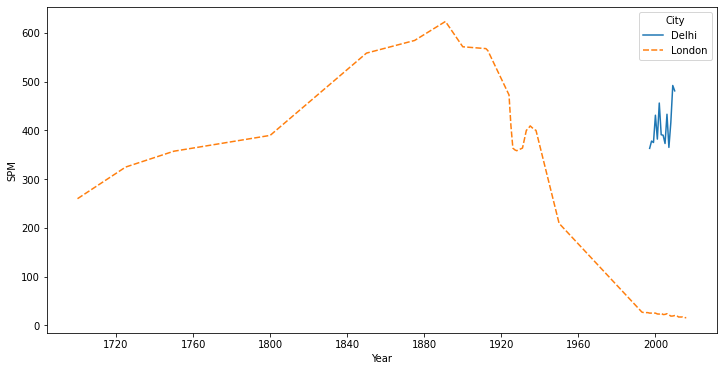

In [39]:
pollution = pollution.pivot("Year", "City", "SPM")
plt.figure(figsize=(12, 6))
sns.lineplot(data=pollution)
plt.ylabel('SPM');

We can see in the plot that the air quality (measured as suspended particle matter) in London was getting worse until around 1880 (presumably because of heating materials such as wood and coal), however, has since been improving.



# Identifying trend and seasonality

Trend, seasonality, and cyclic variations are the most important characteristics of time-series. 

A `trend` is the presence of a long-term increase or decrease in the sequence. 

`Seasonality` is a variation that occurs at specific regular intervals of less than a year. Seasonality can occur on different time spans such as daily, weekly, monthly, or yearly. 

Finally, cyclic variations are rises and falls that are not of a fixed frequency.



An important characteristic of time-series is stationarity. This refers to a property of time-series not to change distribution over time, or in other words, that the process that produces the time-series doesn't change with time. 

**Time-Series that don't change over time are called stationary (or stationary processes).**



In [40]:
temperatures = pd.read_csv('/content/monthly_csv.csv')

In [41]:
temperatures

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [42]:
temperatures['Date'] = pd.to_datetime(temperatures['Date'])

In [43]:
temperatures = temperatures.pivot('Date','Source','Mean')

In [45]:
from numpy import polyfit

# fit polynomial: E = \sum_{j=0}^k |p(x_j) - y_j|^2

def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X = list(range(len(s)))  # (s.index.year - s.index.year.min()).values
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)




Let's plot seasonality and trend on top of our global temperature increases!


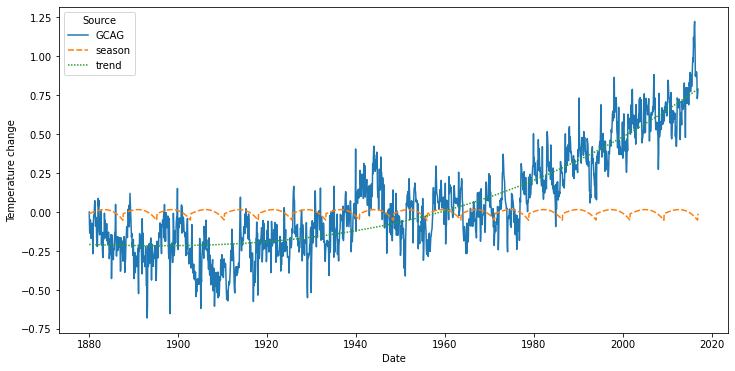

In [46]:
plt.figure(figsize=(12, 6))
temperatures['trend'] = get_trend(temperatures['GCAG'])
temperatures['season'] = get_season(temperatures['GCAG'] - temperatures['trend'])
sns.lineplot(data=temperatures[['GCAG', 'season', 'trend']])
plt.ylabel('Temperature change');

**Autocorrelation** is the correlation of a signal with a lagged version of itself. The autocorrelation plot draws the autocorrelation as a function of lag. 

The autocorrelation plot can help find repeating patterns, and is often used in signal processing. The autocorrelation can help spot a periodic signal.

Let's plot the autocorrelation of the pollution data:



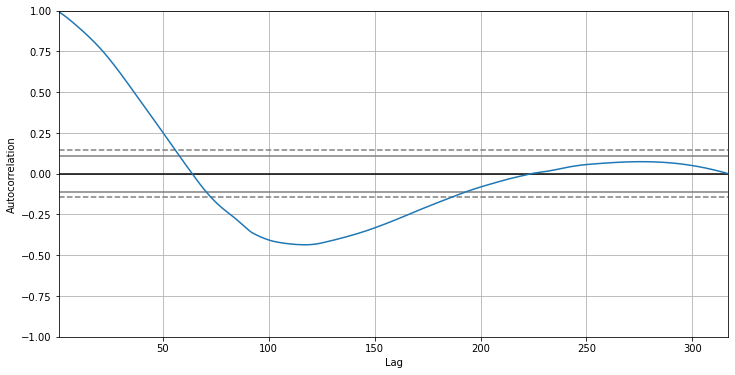

In [64]:

plt.figure(figsize=(12, 6))
pd.plotting.autocorrelation_plot(pollution['London']);

We can see high autocorrelations with a lag of only a few years. There is a negative autocorrelation at around 100 years, after which point the autocorrelation stays around 0.
